In [9]:
import pickle 
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os 
import tqdm
import random
from multiprocessing import Pool
import openslide

In [ ]:
!pip install pandas matplotlib openslide-python

# Data exploration, see below for label generation

In [121]:
slide_name = "98145"
pickle_path = "/export/medical_ai/ucsf/tissue_vs_non_pkl/v2/RTOG-9202/"
nuclei_coords_path = "/export/home/nuclei_coords/raw_annos/"
output_dir = "/export/home/nuclei_coords/256_v2/"

In [59]:
coords_df = pd.read_csv(nuclei_coords_path + slide_name + ".csv", names = ["x1", "y1", "x2", "y2"])
with open(pickle_path + slide_name + ".pkl", "rb") as f:
    tissue_df = pickle.load(f)
    tissue_df = tissue_df[tissue_df.tissue_vs_non]
tissue_df

,path,tissue_vs_non
1,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
13,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
16,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
17,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
20,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
...,...,...
6889,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
6897,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
6898,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True
6900,/export/medical_ai/ucsf/RTOG-9202/patches/patc...,True


In [60]:
coords_df["x1"] = coords_df["x1"].apply(lambda x: int(x / 2))
coords_df["y1"] = coords_df["y1"].apply(lambda x: int(x / 2))
coords_df["x2"] = coords_df["x2"].apply(lambda x: int(x / 2))
coords_df["y2"] = coords_df["y2"].apply(lambda x: int(x / 2))

coords_df

,x1,y1,x2,y2
0,3382,897,3388,902
1,3403,898,3407,900
2,3395,899,3401,904
3,3465,902,3471,906
4,3407,906,3414,908
...,...,...,...,...
277370,24643,14395,24652,14399
277371,24537,14395,24547,14401
277372,24615,14397,24623,14405
277373,24468,14399,24474,14405


In [16]:
example_img = tissue_df.path[1]
example_img

'/export/medical_ai/ucsf/RTOG-9202/patches/patches_256_patchsize_224_resize_0_overlap_3_level/98145/98145_8_48_.png'

In [29]:
x = int(example_img.split("_")[-3]) * 256
y = int(example_img.split("_")[-2]) * 256
x,y

(2048, 12288)

In [61]:
img_coords = coords_df.loc[(coords_df.x1 > x) & (coords_df.y1 > y) & (coords_df.x1 < x + 256) & (coords_df.y1 < y + 256)]

0.02734375 0.04296875 0.259765625 0.025390625
63 1 70 12
0.01171875 0.0234375 0.716796875 0.015625
182 1 185 7
0.02734375 0.03515625 0.283203125 0.037109375
69 5 76 14
0.01953125 0.0234375 0.072265625 0.0390625
16 7 21 13
0.03125 0.0390625 0.59765625 0.046875
149 7 157 17
0.01953125 0.03125 0.787109375 0.046875
199 8 204 16
0.02734375 0.03515625 0.857421875 0.052734375
216 9 223 18
0.046875 0.04296875 0.19140625 0.060546875
43 10 55 21
0.01953125 0.03515625 0.333984375 0.060546875
83 11 88 20
0.015625 0.03515625 0.01953125 0.068359375
3 13 7 22
0.015625 0.0234375 0.83203125 0.0625
211 13 215 19
0.01953125 0.02734375 0.072265625 0.072265625
16 15 21 22
0.03515625 0.02734375 0.306640625 0.072265625
74 15 83 22
0.03515625 0.01953125 0.498046875 0.072265625
123 16 132 21
0.03515625 0.02734375 0.869140625 0.087890625
218 19 227 26
0.0234375 0.03515625 0.83203125 0.099609375
210 21 216 30
0.0234375 0.01953125 0.25390625 0.091796875
62 21 68 26
0.03125 0.0234375 0.109375 0.09765625
24 22 32 2

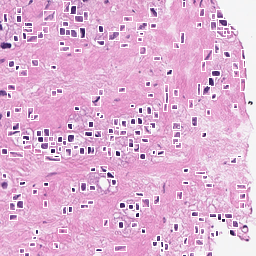

In [63]:
from PIL import Image, ImageDraw

img = Image.open(example_img)
img1 = ImageDraw.Draw(img)
for i, (x1, y1, x2, y2) in img_coords.iterrows():
    x1 -= x
    y1 -= y
    x2 -= x
    y2 -= y
    label_w = (x2 - x1) / 256
    label_h = (y2 - y1) / 256
    label_x = ((x1 + x2) / 2) / 256
    label_y = ((y1 + y2) / 2) / 256
    print(label_w, label_h, label_x, label_y)
    print(x1, y1, x2, y2)
    img1.rectangle(((x1, y1), (x2, y2)))
img

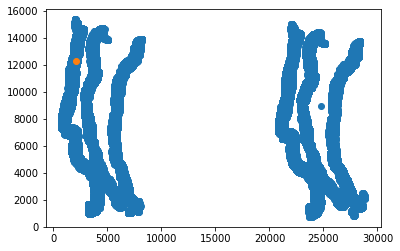

In [36]:
import matplotlib.pyplot as plt
plt.scatter(coords_df.x1, coords_df.y1)
plt.scatter([2048], [12288])

In [41]:
img_coords

,x1,y1,x2,y2
232557,2111,12289,1059,24601
232558,2230,12289,1116,24590
232570,2117,12293,1062,24605
232575,2064,12295,1034,24603
232576,2197,12295,1102,24610
...,...,...,...,...
251025,2253,12539,1130,25096
251027,2237,12540,1121,25102
251029,2072,12540,1038,25092
251032,2230,12542,1117,25094


# label generation

In [139]:
# generate 256x256 patches and labels
def process_slide_256(file):
    for file in [file]:
        slide_name = file.split(".")[0]

        coords_df = pd.read_csv(nuclei_coords_path + slide_name + ".csv", names = ["x1", "y1", "x2", "y2"])
        coords_df["x1"] = coords_df["x1"].apply(lambda x: int(x / 2))
        coords_df["y1"] = coords_df["y1"].apply(lambda x: int(x / 2))
        coords_df["x2"] = coords_df["x2"].apply(lambda x: int(x / 2))
        coords_df["y2"] = coords_df["y2"].apply(lambda x: int(x / 2))

        with open(pickle_path + slide_name + ".pkl", "rb") as f:
            tissue_df = pickle.load(f)
            tissue_df = tissue_df[tissue_df.tissue_vs_non]
        for img_path in tissue_df.path:
            x = int(img_path.split("_")[-3]) * 256
            y = int(img_path.split("_")[-2]) * 256
            img_coords = coords_df.loc[(coords_df.x1 > x) & (coords_df.y1 > y) & (coords_df.x2 < x + 256) & (coords_df.y2 < y + 256)]
            label_str = ""
            for i, (x1, y1, x2, y2) in img_coords.iterrows():
                x1 -= x
                y1 -= y
                x2 -= x
                y2 -= y
                label_w = (x2 - x1) / 256
                label_h = (y2 - y1) / 256
                label_x = ((x1 + x2) / 2) / 256
                label_y = ((y1 + y2) / 2) / 256
    #             print(label_w, label_h, label_x, label_y)
    #             print(x1, y1, x2, y2)
    #             img1.rectangle(((x1, y1), (x2, y2)))
                label_str += "0 {} {} {} {}\n".format(label_x, label_y, label_w, label_h)
            if file in train_files:
                with open(output_dir + "/labels/train/" + img_path.split("/")[-1][:-4] + ".txt", "w") as f:
                    f.write(label_str)
                os.symlink(img_path, output_dir + "/images/train/" + img_path.split("/")[-1])
            else:
                with open(output_dir + "/labels/val/" + img_path.split("/")[-1][:-4] + ".txt", "w") as f:
                    f.write(label_str)
                os.symlink(img_path, output_dir + "/images/val/" + img_path.split("/")[-1])        

output_dir = "/export/home/nuclei_coords/256_v3/"
files = os.listdir(nuclei_coords_path)
random.Random(4).shuffle(files)
train_files = files[:29]
test_files = files[29:]
p = Pool(16)
results = p.starmap(
    process_slide_256, zip(files))
p.close()
         
        

# 512
generate 512x512 patches and labels


In [128]:
def process_slide(file):

    for file in [file]:
        slide_name = file.split(".")[0]

        coords_df = pd.read_csv(nuclei_coords_path + slide_name + ".csv", names = ["x1", "y1", "x2", "y2"])
        coords_df["x1"] = coords_df["x1"]#.apply(lambda x: int(x / 2))
        coords_df["y1"] = coords_df["y1"]#.apply(lambda x: int(x / 2))
        coords_df["x2"] = coords_df["x2"]#.apply(lambda x: int(x / 2))
        coords_df["y2"] = coords_df["y2"]#.apply(lambda x: int(x / 2))

        with open(pickle_path + slide_name + ".pkl", "rb") as f:
            tissue_df = pickle.load(f)
            tissue_df = tissue_df[tissue_df.tissue_vs_non]
        slide = openslide.open_slide("/export/medical_ai/ucsf/RTOG-9202/svs/" + slide_name + ".svs")
        for img_path in tissue_df.path:
            x = int(img_path.split("_")[-3]) * 512
            y = int(img_path.split("_")[-2]) * 512
            img_coords = coords_df.loc[(coords_df.x1 > x) & (coords_df.y1 > y) & (coords_df.x2 < x + 512) & (coords_df.y2 < y + 512)]
            label_str = ""
            for i, (x1, y1, x2, y2) in img_coords.iterrows():
                x1 -= x
                y1 -= y
                x2 -= x
                y2 -= y
                label_w = (x2 - x1) / 512
                label_h = (y2 - y1) / 512
                label_x = ((x1 + x2) / 2) / 512
                label_y = ((y1 + y2) / 2) / 512
    #             print(label_w, label_h, label_x, label_y)
    #             print(x1, y1, x2, y2)
    #             img1.rectangle(((x1, y1), (x2, y2)))
                label_str += "0 {} {} {} {}\n".format(label_x, label_y, label_w, label_h)
            if file in train_files:
                with open(output_dir + "/labels/train/" + img_path.split("/")[-1][:-4] + ".txt", "w") as f:
                    f.write(label_str)
                img = slide.read_region((x,y),0, (512,512))
                img.save(output_dir + "/images/train/" + img_path.split("/")[-1])

            else:
                with open(output_dir + "/labels/val/" + img_path.split("/")[-1][:-4] + ".txt", "w") as f:
                    f.write(label_str)
                img = slide.read_region((x,y),0, (512,512))
                img.save(output_dir + "/images/val/" + img_path.split("/")[-1])

output_dir = "/export/home/nuclei_coords/512_v2/"
files = os.listdir(nuclei_coords_path)
random.Random(4).shuffle(files)
train_files = files[:20]
test_files = files[20:]
p = Pool(16)
results = p.starmap(
    process_slide, zip(files))
p.close()
 
        

# Test set generation

In [10]:
output_dir = "/export/home/nuclei_coords/test_sets/9202/"
input_dir = "/export/medical_ai/ucsf/tissue_vs_non_pkl/v2/RTOG-9202/"
tissue_pickles = os.listdir(input_dir)
random.shuffle(tissue_pickles)
for pkl in tissue_pickles[:400]:
    with open(input_dir + pkl, "rb") as f:
        df = pickle.load(f)
        df = df.loc[df.tissue_vs_non]
    imgs = list(df.path)
    for img in imgs[:1]:
        os.symlink(img, output_dir + img.split("/")[-1])
